In [767]:
#load libraries
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima 


In [768]:
#load folder-the actual data were given in 17 separate excel files
files = os.listdir('dataLoad')
files

['Cons_Report_012018.xlsx',
 'Cons_Report_012019.xlsx',
 'Cons_Report_022018.xlsx',
 'Cons_Report_022019.xlsx',
 'Cons_Report_032018.xlsx',
 'Cons_Report_032019.xlsx',
 'Cons_Report_042018.xlsx',
 'Cons_Report_042019.xlsx',
 'Cons_Report_052018.xlsx',
 'Cons_Report_052019.xlsx',
 'Cons_Report_062018.xlsx',
 'Cons_Report_062019.xlsx',
 'Cons_Report_072018.xlsx',
 'Cons_Report_072019.xlsx',
 'Cons_Report_082018.xlsx',
 'Cons_Report_082019.xlsx',
 'Cons_Report_092018.xlsx',
 'Cons_Report_092019.xlsx',
 'Cons_Report_102018.xlsx',
 'Cons_Report_102019.xlsx',
 'Cons_Report_112018.xlsx',
 'Cons_Report_122018.xlsx',
 'Load Demand_Forecast.xlsx']

In [769]:
#list of files to loop-only xlsx
files_xls = [f for f in files if 'Cons_Report' in f]
files_xls

['Cons_Report_012018.xlsx',
 'Cons_Report_012019.xlsx',
 'Cons_Report_022018.xlsx',
 'Cons_Report_022019.xlsx',
 'Cons_Report_032018.xlsx',
 'Cons_Report_032019.xlsx',
 'Cons_Report_042018.xlsx',
 'Cons_Report_042019.xlsx',
 'Cons_Report_052018.xlsx',
 'Cons_Report_052019.xlsx',
 'Cons_Report_062018.xlsx',
 'Cons_Report_062019.xlsx',
 'Cons_Report_072018.xlsx',
 'Cons_Report_072019.xlsx',
 'Cons_Report_082018.xlsx',
 'Cons_Report_082019.xlsx',
 'Cons_Report_092018.xlsx',
 'Cons_Report_092019.xlsx',
 'Cons_Report_102018.xlsx',
 'Cons_Report_102019.xlsx',
 'Cons_Report_112018.xlsx',
 'Cons_Report_122018.xlsx']

In [770]:
#create one dataframe from all the excel files
actual = pd.DataFrame()
for f in files_xls:
    data = pd.read_excel('dataLoad/' + f)
    actual=actual.append(data, ignore_index=True)

In [771]:
#get column names
actual.columns

Index(['deliveryDay', 'Hour_EET', 'Gen_Aux', 'HV', 'Pump', 'TEL_MV', 'Network',
       'Total'],
      dtype='object')

In [772]:
#rename columns
actual.columns=['Date','Hour','Gen_Aux', 'HV', 'Pump', 'TEL_MV', 'Network','ActualTotal']
actual.head(10)

,Date,Hour,Gen_Aux,HV,Pump,TEL_MV,Network,ActualTotal
0,2018-01-01,1,34.418093,757.020147,0.000,596.563993,4529.773678,5321.211918
1,2018-01-01,2,40.928810,760.024989,0.000,589.266551,4205.128845,5006.082645
2,2018-01-01,3,39.286246,750.624526,0.000,585.334471,4116.742544,4906.653316
3,2018-01-01,4,38.678094,756.567856,0.120,582.210175,3833.136857,4628.502808
4,2018-01-01,5,37.498531,731.949138,130.176,581.251131,3608.455842,4508.079510
5,2018-01-01,6,37.843782,751.929837,358.482,592.809796,3527.228368,4675.483986
6,2018-01-01,7,38.717082,746.040356,365.631,609.285487,3600.189330,4750.577768
7,2018-01-01,8,38.556936,729.051897,256.673,619.337395,3667.999929,4692.281762
8,2018-01-01,9,37.718306,753.256276,248.236,614.221973,3803.437022,4842.647604
9,2018-01-01,10,38.377740,745.177096,11.874,621.179152,4196.899298,4992.328134


In [773]:
#load excel with forecast of the current program
forecast=pd.read_excel("dataLoad/Load Demand_Forecast.xlsx")

In [774]:
#data manipulation to create new dataframe
forecast2=forecast[['Weekday',  'Holiday','Date', 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
prediction = pd.melt(forecast2, id_vars=["Weekday", "Holiday", "Date"])
prediction.head(10)

,Weekday,Holiday,Date,variable,value
0,1,1,2018-01-01,1,5315.0
1,2,0,2018-01-02,1,5023.0
2,3,0,2018-01-03,1,5211.0
3,4,0,2018-01-04,1,5307.0
4,5,0,2018-01-05,1,5420.0
5,6,1,2018-01-06,1,5430.0
6,7,0,2018-01-07,1,5348.0
7,1,0,2018-01-08,1,5170.0
8,2,0,2018-01-09,1,5343.0
9,3,0,2018-01-10,1,5304.0


In [775]:
#rename columns
prediction.columns=[ 'Weekday', 'Holiday', 'Date', 'Hour', 'ForecastTotalLoad' ]
prediction.head(10)

,Weekday,Holiday,Date,Hour,ForecastTotalLoad
0,1,1,2018-01-01,1,5315.0
1,2,0,2018-01-02,1,5023.0
2,3,0,2018-01-03,1,5211.0
3,4,0,2018-01-04,1,5307.0
4,5,0,2018-01-05,1,5420.0
5,6,1,2018-01-06,1,5430.0
6,7,0,2018-01-07,1,5348.0
7,1,0,2018-01-08,1,5170.0
8,2,0,2018-01-09,1,5343.0
9,3,0,2018-01-10,1,5304.0


In [776]:
#subtract one hour to get to 0-23 hour format
actual['Hour']=actual['Hour']-1
prediction['Hour']=prediction['Hour']-1

In [777]:
#set index
actual.set_index(['Date', 'Hour']).head()

Gen_Aux          HV     Pump      TEL_MV      Network  \
Date       Hour                                                            
2018-01-01 0     34.418093  757.020147    0.000  596.563993  4529.773678   
           1     40.928810  760.024989    0.000  589.266551  4205.128845   
           2     39.286246  750.624526    0.000  585.334471  4116.742544   
           3     38.678094  756.567856    0.120  582.210175  3833.136857   
           4     37.498531  731.949138  130.176  581.251131  3608.455842   

                 ActualTotal  
Date       Hour               
2018-01-01 0     5321.211918  
           1     5006.082645  
           2     4906.653316  
           3     4628.502808  
           4     4508.079510

In [778]:
#set index
prediction.set_index(['Date', 'Hour']).head()

,,Weekday,Holiday,ForecastTotalLoad
Date,Hour,,,
2018-01-01,0,1,1,5315.0
2018-01-02,0,2,0,5023.0
2018-01-03,0,3,0,5211.0
2018-01-04,0,4,0,5307.0
2018-01-05,0,5,0,5420.0


In [779]:
#merge datasets
final = pd.merge(prediction, actual, on=['Date', 'Hour'])
final.head()

,Weekday,Holiday,Date,Hour,ForecastTotalLoad,Gen_Aux,HV,Pump,TEL_MV,Network,ActualTotal
0,1,1,2018-01-01,0,5315.0,34.418093,757.020147,0.000,596.563993,4529.773678,5321.211918
1,2,0,2018-01-02,0,5023.0,45.218816,751.513843,0.000,610.814364,4101.718326,4898.450985
2,3,0,2018-01-03,0,5211.0,37.042898,904.679508,0.000,800.563658,4283.392261,5225.114667
3,4,0,2018-01-04,0,5307.0,35.636497,918.203986,0.000,853.288369,4450.591164,5404.431647
4,5,0,2018-01-05,0,5420.0,37.712368,961.116481,23.108,866.047536,4617.594242,5639.531090


In [780]:
#create Timestamp column
final['Timestamp'] = final['Date'] + pd.to_timedelta(final['Hour'], unit='h')
final.head()

,Weekday,Holiday,Date,Hour,ForecastTotalLoad,Gen_Aux,HV,Pump,TEL_MV,Network,ActualTotal,Timestamp
0,1,1,2018-01-01,0,5315.0,34.418093,757.020147,0.000,596.563993,4529.773678,5321.211918,2018-01-01
1,2,0,2018-01-02,0,5023.0,45.218816,751.513843,0.000,610.814364,4101.718326,4898.450985,2018-01-02
2,3,0,2018-01-03,0,5211.0,37.042898,904.679508,0.000,800.563658,4283.392261,5225.114667,2018-01-03
3,4,0,2018-01-04,0,5307.0,35.636497,918.203986,0.000,853.288369,4450.591164,5404.431647,2018-01-04
4,5,0,2018-01-05,0,5420.0,37.712368,961.116481,23.108,866.047536,4617.594242,5639.531090,2018-01-05


In [781]:
#sort by timestamp
final.sort_values('Timestamp', inplace=True)
final.head()

,Weekday,Holiday,Date,Hour,ForecastTotalLoad,Gen_Aux,HV,Pump,TEL_MV,Network,ActualTotal,Timestamp
0,1,1,2018-01-01,0,5315.0,34.418093,757.020147,0.000,596.563993,4529.773678,5321.211918,2018-01-01 00:00:00
669,1,1,2018-01-01,1,4963.0,40.928810,760.024989,0.000,589.266551,4205.128845,5006.082645,2018-01-01 01:00:00
1338,1,1,2018-01-01,2,4838.0,39.286246,750.624526,0.000,585.334471,4116.742544,4906.653316,2018-01-01 02:00:00
2007,1,1,2018-01-01,3,4515.0,38.678094,756.567856,0.120,582.210175,3833.136857,4628.502808,2018-01-01 03:00:00
2676,1,1,2018-01-01,4,4280.0,37.498531,731.949138,130.176,581.251131,3608.455842,4508.079510,2018-01-01 04:00:00


In [782]:
#create the column of interest
final['LV'] = final['Network'] - final['TEL_MV']

#find the percentage of XT as to total ActualLoad for that day and Hour (TrueValues)
final['%LVofTotal']=final['LV']/final['ActualTotal']

#find the estimation of XTPrediction
final['LVForecastEstimation']=final['%LVofTotal']*final['ForecastTotalLoad']

final['Deviation']=final['ActualTotal']-final['ForecastTotalLoad']

In [783]:
final

,Weekday,Holiday,Date,Hour,ForecastTotalLoad,Gen_Aux,HV,Pump,TEL_MV,Network,ActualTotal,Timestamp,LV,%LVofTotal,LVForecastEstimation,Deviation
0,1,1,2018-01-01,0,5315.0,34.418093,757.020147,0.000,596.563993,4529.773678,5321.211918,2018-01-01 00:00:00,3933.209685,0.739157,3928.618104,6.211918
669,1,1,2018-01-01,1,4963.0,40.928810,760.024989,0.000,589.266551,4205.128845,5006.082645,2018-01-01 01:00:00,3615.862294,0.722294,3584.743969,43.082645
1338,1,1,2018-01-01,2,4838.0,39.286246,750.624526,0.000,585.334471,4116.742544,4906.653316,2018-01-01 02:00:00,3531.408073,0.719718,3481.997027,68.653316
2007,1,1,2018-01-01,3,4515.0,38.678094,756.567856,0.120,582.210175,3833.136857,4628.502808,2018-01-01 03:00:00,3250.926682,0.702371,3171.205588,113.502808
2676,1,1,2018-01-01,4,4280.0,37.498531,731.949138,130.176,581.251131,3608.455842,4508.079510,2018-01-01 04:00:00,3027.204711,0.671507,2874.047836,228.079510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13379,4,0,2019-10-31,19,6011.0,25.846024,730.420719,0.000,1339.675368,5390.350421,6146.617165,2019-10-31 19:00:00,4050.675054,0.659009,3961.302143,135.617165
14048,4,0,2019-10-31,20,5913.0,26.163921,723.475186,0.000,1311.226656,5309.782663,6059.421771,2019-10-31 20:00:00,3998.556006,0.659891,3901.933643,146.421771
14717,4,0,2019-10-31,21,5523.0,26.181055,723.925940,0.000,1218.650557,4899.784871,5649.891865,2019-10-31 21:00:00,3681.134314,0.651541,3598.459103,126.891865
15386,4,0,2019-10-31,22,5005.0,29.782536,676.712986,97.617,1121.828436,4351.407631,5155.520153,2019-10-31 22:00:00,3229.579195,0.626431,3135.288660,150.520153


In [784]:
#finalize dataset and set frequency
final=final[['Timestamp','LV','Weekday','Holiday','LVForecastEstimation','%LVofTotal','ActualTotal','Deviation','ForecastTotalLoad']]
final.sort_values('Timestamp', inplace=True)
final.set_index('Timestamp', inplace=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [785]:
final.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2019-10-31 14:00:00', '2019-10-31 15:00:00',
               '2019-10-31 16:00:00', '2019-10-31 17:00:00',
               '2019-10-31 18:00:00', '2019-10-31 19:00:00',
               '2019-10-31 20:00:00', '2019-10-31 21:00:00',
               '2019-10-31 22:00:00', '2019-10-31 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=16054, freq=None)

In [786]:
#check for missing values
pd.date_range(final.index.min(), final.index.max(), freq='H').difference(final.index)

DatetimeIndex(['2018-03-25 23:00:00', '2019-03-31 23:00:00'], dtype='datetime64[ns]', freq=None)

In [787]:
#set Hourly index frequency
final = final.asfreq(freq='H', method='pad')
final.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2019-10-31 14:00:00', '2019-10-31 15:00:00',
               '2019-10-31 16:00:00', '2019-10-31 17:00:00',
               '2019-10-31 18:00:00', '2019-10-31 19:00:00',
               '2019-10-31 20:00:00', '2019-10-31 21:00:00',
               '2019-10-31 22:00:00', '2019-10-31 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=16056, freq='H')

In [788]:
#check again for NaN in dataframe γιατι τώρα που κουβαλάω και την επιπλέον στήλη εχω το ίδιο θέμα με την ώρα
final[final.isnull().any(axis=1)]

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad
Timestamp,,,,,,,,
2018-03-25 03:00:00,2507.887529,7,1,NaN,0.589349,4255.350588,NaN,NaN


In [789]:
#NaN that day for forecastedValues
final.loc['2018-03-25 03:00:00']

LV                      2507.887529
Weekday                    7.000000
Holiday                    1.000000
LVForecastEstimation            NaN
%LVofTotal                 0.589349
ActualTotal             4255.350588
Deviation                       NaN
ForecastTotalLoad               NaN
Name: 2018-03-25 03:00:00, dtype: float64

In [790]:
#fill with previous value ΝαΝ
final=final.fillna(method='ffill')

In [791]:
#fixed
final.loc['2018-03-25 03:00:00']

LV                      2507.887529
Weekday                    7.000000
Holiday                    1.000000
LVForecastEstimation    2648.583949
%LVofTotal                 0.589349
ActualTotal             4255.350588
Deviation                  9.662458
ForecastTotalLoad       4430.000000
Name: 2018-03-25 03:00:00, dtype: float64

In [792]:
final

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad
Timestamp,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0
...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0


# Data Exploration

Text(0.5, 1.0, 'Low Voltage Load Demand VS Holiday')

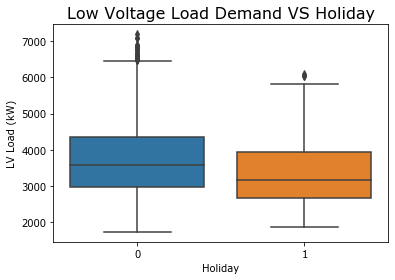

In [793]:
#Here is going to be the EDA part-just some quick insights
import seaborn as sns
sns.boxplot(x=final['Holiday'],y=final['LV']).set(ylabel='LV Load (kW)',xlabel='Holiday')
plt.title('Low Voltage Load Demand VS Holiday',fontsize=16)

Text(0.5, 1.0, 'Low Voltage Load Demand VS Weekday')

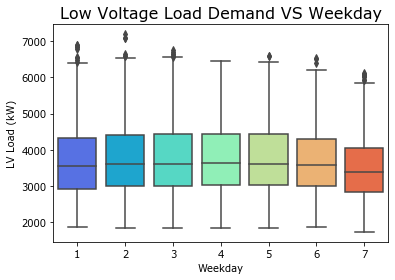

In [794]:
sns.boxplot(x=final['Weekday'],y=final['LV'],palette='rainbow').set(ylabel='LV Load (kW)',xlabel='Weekday')
plt.title('Low Voltage Load Demand VS Weekday',fontsize=16)

Text(0.5, 1.0, 'Low Voltage Load Demand')

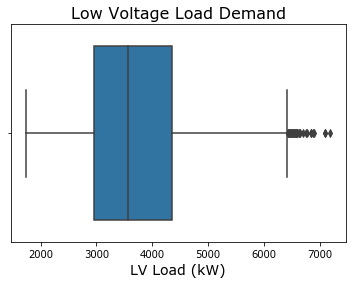

In [795]:
#there are some outliers
sns.boxplot(x=final['LV']).set_xlabel('LV Load (kW)',fontsize=14)
plt.title('Low Voltage Load Demand',fontsize=16)


In [796]:
#check largest Values-seems logical not extreme values
print( final['LV'].nlargest(100))

Timestamp
2019-01-08 19:00:00    7187.273484
2019-01-08 18:00:00    7092.001648
2019-01-08 20:00:00    7087.291997
2019-01-07 19:00:00    6889.243639
2018-12-31 19:00:00    6886.460958
                          ...     
2019-02-13 20:00:00    6129.427284
2019-08-02 17:00:00    6128.394761
2019-02-24 12:00:00    6126.753362
2019-08-01 16:00:00    6124.848840
2018-12-13 20:00:00    6123.033986
Name: LV, Length: 100, dtype: float64


TypeError: float() argument must be a string or a number, not 'Period'

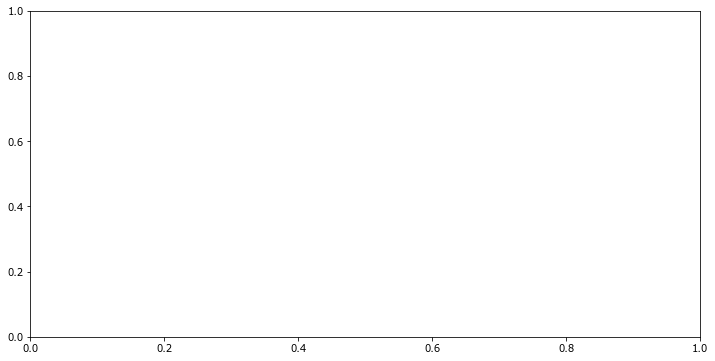

In [797]:
final['LV'].iloc[120:144].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('LV Load (kW)', fontsize=14)
plt.title('Daily Actual LV Load Demand per Hour', fontsize=16)

TypeError: float() argument must be a string or a number, not 'Period'

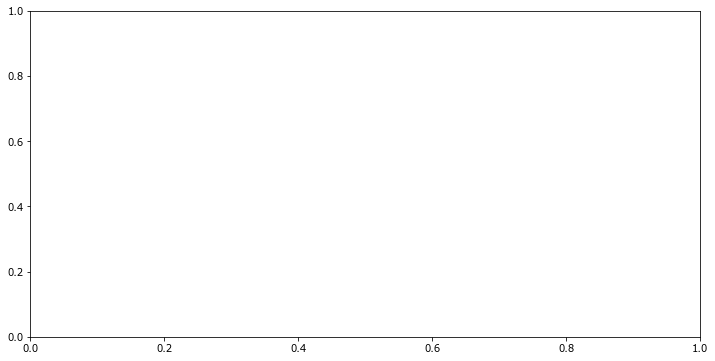

In [798]:
final['LV'].loc['2018-01-01':'2018-12-31'].plot(figsize=(12,6)).autoscale(axis='x',tight=True);
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('LV Load (kW)', fontsize=14)
plt.title('2018 Actual LV Load Demand (Historical Data)', fontsize=16)

TypeError: float() argument must be a string or a number, not 'Period'

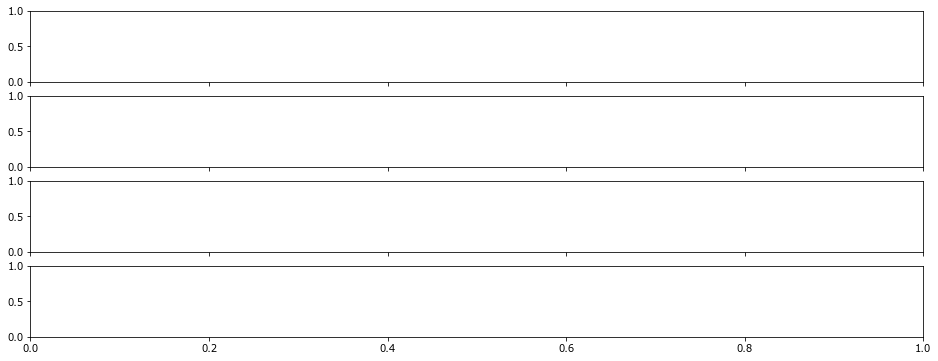

In [799]:
fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(16,6))

result = seasonal_decompose(final['LV'])

result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed',fontsize=14)
result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend',fontsize=14)
result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal',fontsize=14)
result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual',fontsize=14)


In [ ]:
#create ad-fuller test function
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [800]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

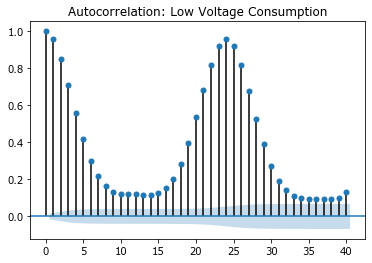

In [801]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Low Voltage Consumption'
lags = 40
plot_acf(final['LV'],title=title,lags=lags);

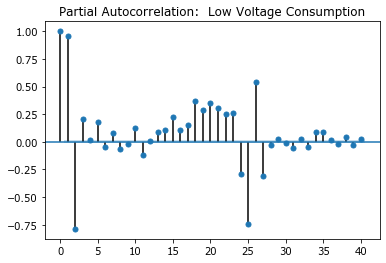

In [802]:
title='Partial Autocorrelation:  Low Voltage Consumption'
lags=40
plot_pacf(final['LV'],title=title,lags=lags);

In [803]:
#KPSS test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(series):
    print ('Results of KPSS Test:')
    kpsstest = kpss(series, regression='c', lags='auto')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [804]:
kpss_test(final['LV'])

Results of KPSS Test:
Test Statistic            0.698710
p-value                   0.013663
Lags Used                59.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [805]:
adf_test(final['LV'])

Augmented Dickey-Fuller Test: 
ADF test statistic         -3.936734
p-value                     0.001781
# lags used                43.000000
# observations          16012.000000
critical value (1%)        -3.430758
critical value (5%)        -2.861721
critical value (10%)       -2.566866
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [806]:
final2=final

In [807]:
final2

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad
Timestamp,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0
...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0


### Calculate Percentage for Future ADMHE Prediction Adjustment 
### and inserting it into model

In [808]:
final3=final2.copy()

In [809]:
final3

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad
Timestamp,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0
...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0


In [810]:
final3['Timestamp']=final3.index
final3['Month'] = pd.to_numeric(final3['Timestamp'].dt.strftime('%m'))
final3['Year'] = pd.to_numeric(final3['Timestamp'].dt.strftime('%Y'))
final3['Hour'] = pd.to_numeric(final3['Timestamp'].dt.strftime('%H'))

In [811]:
final3

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad,Timestamp,Month,Year,Hour
Timestamp,,,,,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0,2018-01-01 00:00:00,1,2018,0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0,2018-01-01 01:00:00,1,2018,1
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0,2018-01-01 02:00:00,1,2018,2
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0,2018-01-01 03:00:00,1,2018,3
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0,2018-01-01 04:00:00,1,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0,2019-10-31 19:00:00,10,2019,19
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0,2019-10-31 20:00:00,10,2019,20
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0,2019-10-31 21:00:00,10,2019,21


In [812]:
final3=final3[['Weekday','Holiday','ForecastTotalLoad','Month','Year','Hour','%LVofTotal']]

In [813]:
X_train=final3.loc[:'2019-09-14'][['Weekday','Holiday','ForecastTotalLoad','Month','Year','Hour']]
y_train=final3.loc[:'2019-09-14']['%LVofTotal']

In [814]:
X_test=final3.loc['2019-09-15'][['Weekday','Holiday','ForecastTotalLoad','Month','Year','Hour']]
y_test=final3.loc['2019-09-15']['%LVofTotal'].to_frame()

In [815]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [816]:
rfc=RandomForestRegressor(random_state = 0,n_estimators=700,
                         min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=20)

param_grid = { 
    'n_estimators': [200, 300,400,500,600,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15, 100],
    'max_depth' : [5,10,15,20,25,30],
    'min_samples_leaf' : [1, 2, 5, 10]
}

In [817]:
#fit the model to calculate percentage of LV (You can not know it before)
f=rfc.fit(X_train,y_train)

In [818]:
#make predictions for percentage
y_1= f.predict(X_test)

In [819]:
#the predictions on what to expect for 
y_1

array([0.58829412, 0.55962159, 0.54294585, 0.53258074, 0.53031217,
       0.53120411, 0.53807811, 0.53667957, 0.58366516, 0.61574483,
       0.62879523, 0.6516053 , 0.64918488, 0.64648325, 0.64190321,
       0.62604927, 0.63347948, 0.63260804, 0.62381576, 0.66172439,
       0.66819572, 0.67288217, 0.64407814, 0.63716902])

In [691]:
#what ADMHE predicted on the specific day for the whole network
p=prediction.loc[prediction['Date'] == '2019-09-15']['ForecastTotalLoad']

In [692]:
#how is the total prediction translated to LV only based on ADMHE's whole forecast
LVp=p*y_1

In [693]:
LVprediction=pd.DataFrame(LVp.reset_index(drop=True))
t=pd.DataFrame(final2.loc['2019-09-15']['LV'].index)
plot=t.join(s)
temp=final2.loc['2019-09-15']['LV'].reset_index(drop=True)
plot=plot.join(temp).set_index('Timestamp')
plot.columns = ['AdmheLVadjustedForecast', 'ActualLVLoad']

In [694]:
plot #What we forecasted 

,AdmheLVadjustedForecast,ActualLVLoad
Timestamp,,
2019-09-15 00:00:00,2570.445313,2902.763294
2019-09-15 01:00:00,2296.375410,2655.955430
2019-09-15 02:00:00,2137.421665,2469.018933
2019-09-15 03:00:00,2066.635065,2365.265871
2019-09-15 04:00:00,2049.654208,2305.693300
2019-09-15 05:00:00,2118.394832,2299.071236
2019-09-15 06:00:00,2389.126336,2356.332090
2019-09-15 07:00:00,2719.158942,2361.557496
2019-09-15 08:00:00,3037.264082,2685.277618


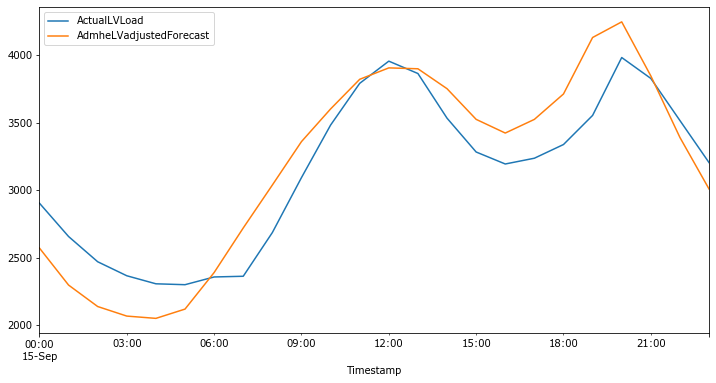

In [695]:
# Plot predictions against known values
ax = plot['ActualLVLoad'].plot(legend=True,figsize=(12,6))
plot['AdmheLVadjustedForecast'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [696]:
Error=rmse(test['LV'],LVp)

In [697]:
Error

250.8566930029131

# SARIMAX

In [41]:
# Auto_Arima
model=auto_arima(final2['LV'],
                      m=24,             
                      seasonal=True,   #Seasonality
                      exogenous=final2[['Weekday','Holiday']],
                      trace=True, error_action='ignore', suppress_warnings=True,stepwise=True)

KeyboardInterrupt: 

In [698]:
model.summary()

AttributeError: 'SARIMAX' object has no attribute 'summary'

In [ ]:
model.plot_diagnostics(figsize=(10,7))
plt.show()

In [670]:
#use the period used for training
df1=final2
df1.shape

(16056, 8)

In [699]:
#train test split
train = df1.loc[:'2019-09-15'].iloc[:-24]
test = df1.loc[:'2019-09-15'].iloc[-24:]

In [700]:
train

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad
Timestamp,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0
...,...,...,...,...,...,...,...,...
2019-09-14 19:00:00,3708.124552,6,0,3735.084427,0.623866,5943.785777,-43.214223,5987.0
2019-09-14 20:00:00,4076.138779,6,0,4086.716767,0.650958,6261.750132,-16.249868,6278.0
2019-09-14 21:00:00,3848.413260,6,0,3862.376071,0.646315,5954.396263,-21.603737,5976.0


In [701]:
#run model
model = SARIMAX(train['LV'],
                exog=train[['Holiday','Weekday']],
                order=(1, 1, 1),
                seasonal_order=(2, 0, 0, 24),trend='t',
                enforce_invertibility=False,enforce_stationarity=False)#initialization='approximate_diffuse'
results = model.fit()
results.summary()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                 LV   No. Observations:                14928
Model:             SARIMAX(1, 1, 1)x(2, 0, 0, 24)   Log Likelihood              -85532.479
Date:                            Sun, 05 Jan 2020   AIC                         171080.958
Time:                                    18:08:42   BIC                         171141.820
Sample:                                01-01-2018   HQIC                        171101.159
                                     - 09-14-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -4.954e-05    4.7e-05     -1.055      0.292      -0.000    4.25e-05
Holiday       23.3105      7.753      3.007      0.003       8.114      38.507
Weekday       -1.1233      1.087     -1.034      0.301      -3.253       1.006
ar.L1          0.7316      0.014     54.150      0.000       0.705       0.758
ma.L1         -0.5305      0.015    -35.227      0.000      -0.560      -0.501
ar.S.L24       0.8738      0.007    128.989      0.000       0.860       0.887
ar.S.L48       0.0759      0.007     10.839      0.000       0.062       0.090
sigma2      7225.0419     59.675    121.074      0.000    7108.081    7342.002
===================================================================================
Ljung-Box (Q):                     9038.48   Jarque-Bera (JB):             64402.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [702]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['Holiday','Weekday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, 
                              end=end, 
                              exog=exog_forecast).rename('Our Prediction')

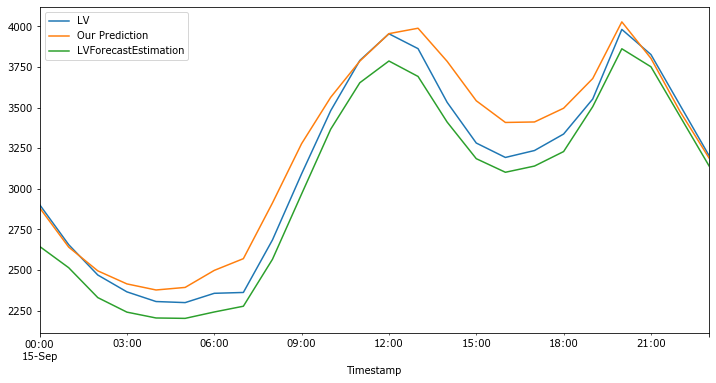

In [703]:
# Plot predictions against known values
ax = test['LV'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)
final['LVForecastEstimation'].loc['2019-09-15'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [704]:
from statsmodels.tools.eval_measures import mse,rmse
#calculate rmse
OurError= rmse(test['LV'], predictions)
TheirError = rmse(final['LVForecastEstimation'].loc['2019-09-15'], test['LV'])

In [705]:
TheirError#if they knew exactly the percentage of LV, which can not be done. This will be our metric, something like 
#best case scenario based on their forecast.

123.23233504842186

In [706]:
OurError

136.03294382134655

# Prophet

In [707]:
#import ProphetLibrary
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [708]:
#create weekday Dataframe for possible use by Prophet
temp=test.reset_index()
tholiday= pd.DataFrame({
    'ds': temp['Timestamp'],
    'Holiday': temp['Holiday']
})
tholiday

,ds,Holiday
0,2019-09-15 00:00:00,0
1,2019-09-15 01:00:00,0
2,2019-09-15 02:00:00,0
3,2019-09-15 03:00:00,0
4,2019-09-15 04:00:00,0
5,2019-09-15 05:00:00,0
6,2019-09-15 06:00:00,0
7,2019-09-15 07:00:00,0
8,2019-09-15 08:00:00,0
9,2019-09-15 09:00:00,0


In [709]:
#create weekday Dataframe for possible use by Prophet
temp=train.reset_index()
holiday= pd.DataFrame({
    'ds': temp['Timestamp'],
    'Holiday': temp['Holiday']
})
holiday

,ds,Holiday
0,2018-01-01 00:00:00,1
1,2018-01-01 01:00:00,1
2,2018-01-01 02:00:00,1
3,2018-01-01 03:00:00,1
4,2018-01-01 04:00:00,1
...,...,...
14923,2019-09-14 19:00:00,0
14924,2019-09-14 20:00:00,0
14925,2019-09-14 21:00:00,0
14926,2019-09-14 22:00:00,0


In [710]:
#create train weekday Dataframe for possible use by Prophet
temp=train.reset_index()
weekday = pd.DataFrame({
    'ds': temp['Timestamp'],
    'weekday': temp['Weekday']
})
weekday

,ds,weekday
0,2018-01-01 00:00:00,1
1,2018-01-01 01:00:00,1
2,2018-01-01 02:00:00,1
3,2018-01-01 03:00:00,1
4,2018-01-01 04:00:00,1
...,...,...
14923,2019-09-14 19:00:00,6
14924,2019-09-14 20:00:00,6
14925,2019-09-14 21:00:00,6
14926,2019-09-14 22:00:00,6


In [711]:
#create test weekday Dataframe for possible use by Prophet
temp=test.reset_index()
tweekday = pd.DataFrame({
    'ds': temp['Timestamp'],
    'weekday': temp['Weekday']
})
tweekday

,ds,weekday
0,2019-09-15 00:00:00,7
1,2019-09-15 01:00:00,7
2,2019-09-15 02:00:00,7
3,2019-09-15 03:00:00,7
4,2019-09-15 04:00:00,7
5,2019-09-15 05:00:00,7
6,2019-09-15 06:00:00,7
7,2019-09-15 07:00:00,7
8,2019-09-15 08:00:00,7
9,2019-09-15 09:00:00,7


In [712]:
train1=pd.merge(weekday, holiday, left_on='ds', right_on='ds', how='left')

In [713]:
test1=pd.merge(tweekday, tholiday, left_on='ds', right_on='ds', how='left')

In [718]:
train['LV']

Timestamp
2018-01-01 00:00:00    3933.209685
2018-01-01 01:00:00    3615.862294
2018-01-01 02:00:00    3531.408073
2018-01-01 03:00:00    3250.926682
2018-01-01 04:00:00    3027.204711
                          ...     
2019-09-14 19:00:00    3708.124552
2019-09-14 20:00:00    4076.138779
2019-09-14 21:00:00    3848.413260
2019-09-14 22:00:00    3511.139159
2019-09-14 23:00:00    3214.702314
Freq: H, Name: LV, Length: 14928, dtype: float64

In [719]:
fs=pd.merge(train['LV'].reset_index().rename(columns={'Timestamp':'ds', 'LV':'y'}), train1, left_on='ds', right_on='ds', how='left')

In [720]:
fs.rename(columns={'Holiday':'holiday'}, inplace=True)
test1.rename(columns={'Holiday':'holiday'}, inplace=True)

In [721]:
fs2=fs.append(test1)

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [722]:
fs2

,ds,holiday,weekday,y
0,2018-01-01 00:00:00,1,1,3933.209685
1,2018-01-01 01:00:00,1,1,3615.862294
2,2018-01-01 02:00:00,1,1,3531.408073
3,2018-01-01 03:00:00,1,1,3250.926682
4,2018-01-01 04:00:00,1,1,3027.204711
...,...,...,...,...
19,2019-09-15 19:00:00,0,7,NaN
20,2019-09-15 20:00:00,0,7,NaN
21,2019-09-15 21:00:00,0,7,NaN
22,2019-09-15 22:00:00,0,7,NaN


In [723]:
#fit Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True,growth='linear'
                    ,seasonality_mode='multiplicative',changepoint_prior_scale=50,seasonality_prior_scale=50,holidays_prior_scale=30
                     )#.add_seasonality(name='daily',period=24,fourier_order=20).add_seasonality(name='weekly',period=168,fourier_order=20)
prophet_model.add_regressor('holiday')
prophet_model.add_regressor('weekday')
prophet_model.fit(fs)

In [724]:
#predict
prophet_forecast = prophet_model.predict(fs2[['ds','holiday','weekday']])

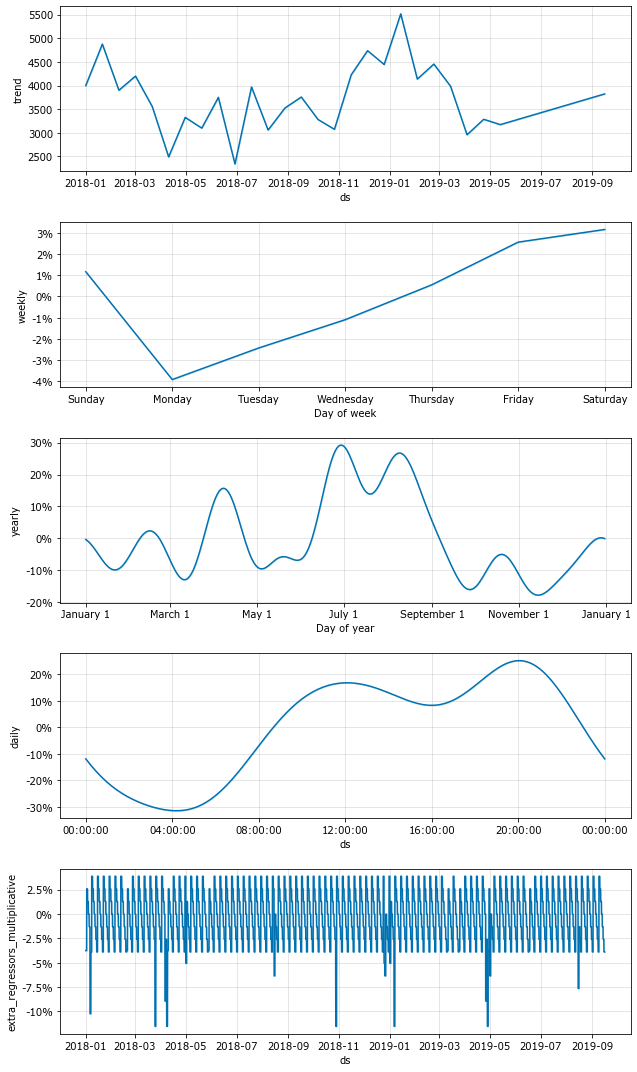

In [725]:
#store predictions
_ = prophet_model.plot_components(prophet_forecast)

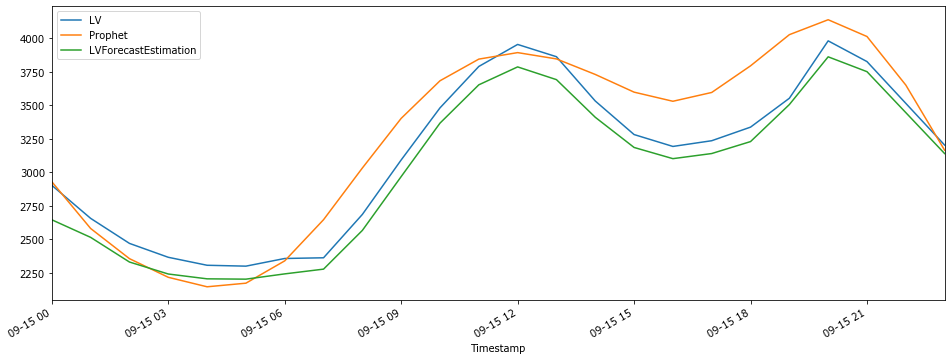

In [726]:
# Plot predictions against known values
fig, axes = plt.subplots(1, figsize=(16,6))
axes.plot(test.index, test['LV'], label='LV')
axes.plot(test.index, prophet_forecast['yhat'].tail(24), label='Prophet', axes=axes)
final['LVForecastEstimation'].loc['2019-09-15'].plot(legend=True, axes=axes)
axes.autoscale(axis='x', tight=True)
axes.legend()

In [727]:
#calculate Error
from statsmodels.tools.eval_measures import mse,rmse
prophet_error= rmse(test['LV'], prophet_forecast['yhat'].tail(24))

In [728]:
#worse
prophet_error

235.2087046210609

# LSTM 

In [729]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [730]:
#final_lstm_multi = final[['Weekday','LV','Holiday']]
final_lstm_multi = final2[['Weekday','LV','Holiday']]
final_lstm_multi = pd.DataFrame(final_lstm_multi)
final_lstm_multi= final_lstm_multi.loc['2018-01-01':'2019-10-31']
final_lstm_multi.head()

,Weekday,LV,Holiday
Timestamp,,,
2018-01-01 00:00:00,1,3933.209685,1
2018-01-01 01:00:00,1,3615.862294,1
2018-01-01 02:00:00,1,3531.408073,1
2018-01-01 03:00:00,1,3250.926682,1
2018-01-01 04:00:00,1,3027.204711,1


In [731]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler


ct = ColumnTransformer([
        ("weekday", OneHotEncoder(categories='auto'), [0]),
        ("LV", MinMaxScaler(feature_range=(0,1)), [1]),
        ("holiday", "passthrough", [2])],
        sparse_threshold=0)

In [732]:
final_lstm_multi['LV']=sc.fit_transform(final_lstm_multi[['LV']])

In [733]:
dataset = ct.fit_transform(final_lstm_multi.values)
dataset[0:100:10]

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.40280533, 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.4197427 , 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.52861615, 1.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21481504, 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.45699946, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.22887572, 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.527287  , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.51736151, 0.        ],


In [734]:
import tensorflow as tf
tf.enable_eager_execution()
tf.executing_eagerly()

True

In [735]:
TRAIN_SPLIT = dataset.shape[0] * 2 // 3
TRAIN_SPLIT

10704

In [736]:
STEP = 1 # We are going to use all samples

In [737]:
def multivariate_data(dataset, target, start_index, end_index, 
                      history_size, target_size, 
                      step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [738]:
past_history = 15 * 24 # 15 days in the past
future_target = 24 # one day in the future

In [739]:
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, -2], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, -2],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

In [740]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('Target load to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (360, 9)
Target load to predict : (24,)


In [741]:
BATCH_SIZE = 256
BUFFER_SIZE = x_train_multi.shape[0]
BUFFER_SIZE

10344

In [742]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [743]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(16, 10))
    num_in = [ x for x in range(-int(history.shape[0]), 0, 1)]
    num_out = int(true_future.shape[0])

    plt.plot(num_in, np.array(history[:, -2]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 
             color='green',
             label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 
                 color='brown',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

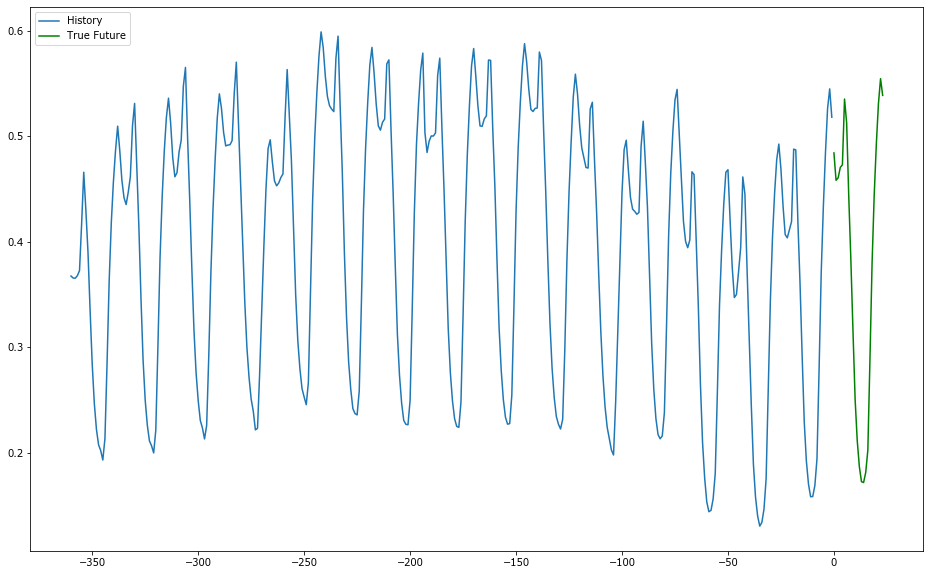

In [744]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

In [745]:
multivariate_model = tf.keras.models.Sequential()
multivariate_model.add(tf.keras.layers.LSTM(units=100, return_sequences=True, 
                                            input_shape=x_train_multi.shape[-2:]))
multivariate_model.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
multivariate_model.add(tf.keras.layers.LSTM(units=50))
multivariate_model.add(tf.keras.layers.Dense(units=24))
multivariate_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 360, 100)          44000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 360, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 24)                1224      
Total params: 155,824
Trainable params: 155,824
Non-trainable params: 0
_________________________________________________________________


In [746]:
multivariate_model.compile(optimizer='adam', loss='mean_squared_error')

In [747]:
for x, y in val_data_multi.take(1):
    print (multivariate_model.predict(x).shape)

(256, 24)


In [748]:
multivariate_history = multivariate_model.fit(train_data_multi, 
                                              epochs=15,
                                              steps_per_epoch=x_train_multi.shape[0] / BATCH_SIZE,
                                              validation_data=val_data_multi,
                                              validation_steps=50)

Train for 40.40625 steps, validate for 50 steps


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


41/40 [==============================] - 192s 5s/step - loss: 0.0484 - val_loss: 0.0176


In [749]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

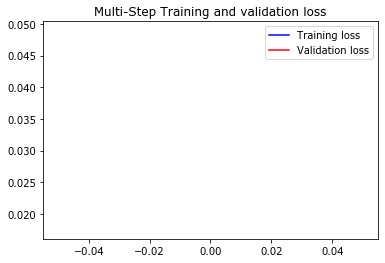

In [750]:
plot_train_history(multivariate_history, 'Multi-Step Training and validation loss')

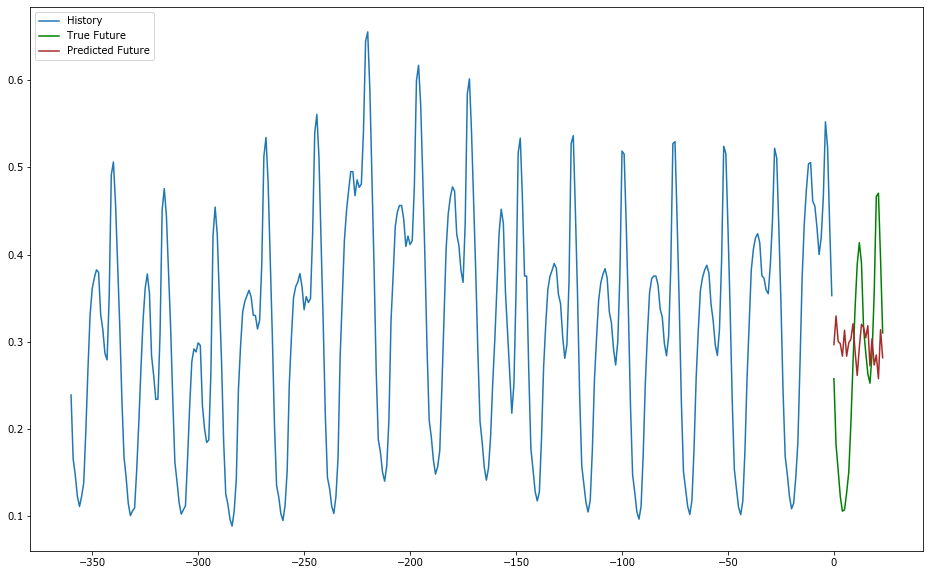

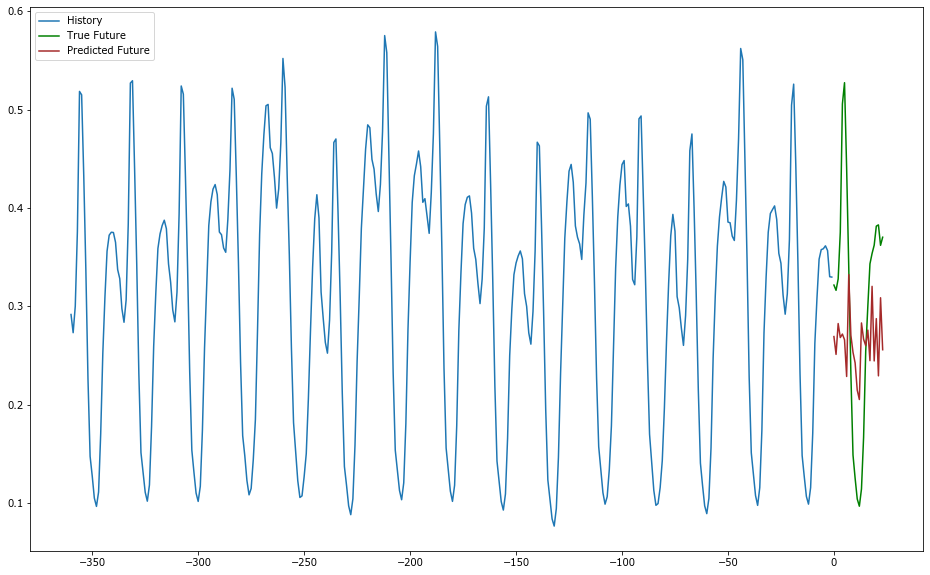

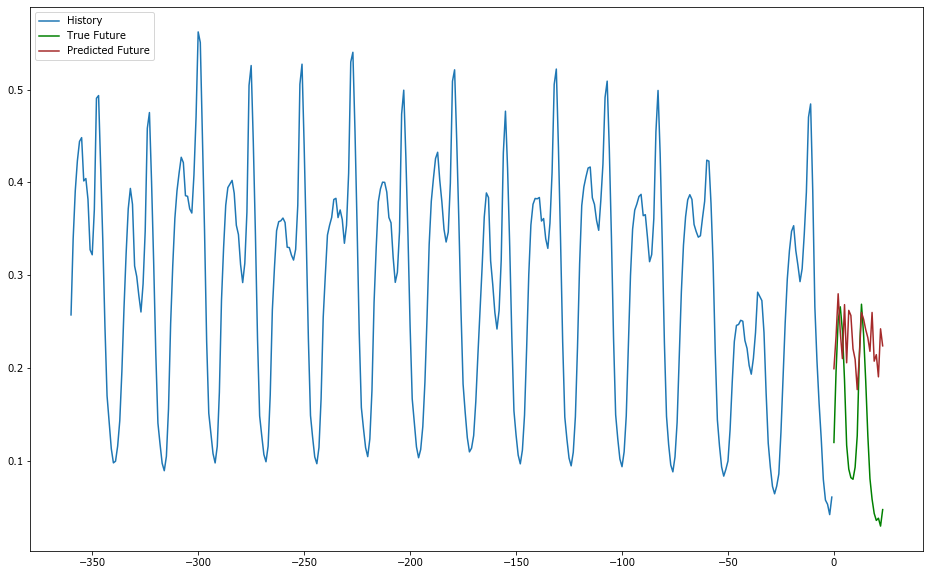

In [751]:
for x, y in val_data_multi.take(3):
    multi_step_plot(x[0], y[0], multivariate_model.predict(x)[0])

In [752]:
from statsmodels.tools.eval_measures import mse,rmse
def evaluate_LSTM(z,y):
    scores=[]
    for i in range(0,z.shape[0]):
    
        trainPredict_dataset_like=np.zeros(shape=(len(z[i]),3))
        trainPredict_dataset_like[:,1]=z[i]
        Predict=sc.inverse_transform(trainPredict_dataset_like)[:,1]
    
        actual_dataset_like=np.zeros(shape=(len(np.asarray(y[i])),3))
        actual_dataset_like[:,1]=np.asarray(y[i])
        actual=sc.inverse_transform(actual_dataset_like)[:,1]
        scores.append(rmse(Predict,actual))
    
    return scores, sum(scores) / len(scores)

In [753]:
evaluate_LSTM(multivariate_model.predict(x),y)

([660.7342575858406,
  676.9327386246808,
  691.3215671773373,
  692.85659966836,
  682.263597330701,
  658.221018057571,
  643.6900452029744,
  632.0921528414361,
  619.4618525548682,
  610.367962869018,
  586.2522806621267,
  566.9465683898613,
  577.2518841321333,
  593.063085809666,
  606.334761922783,
  618.0847350944936,
  619.180941795895,
  619.8939744446845,
  608.7739538551639,
  590.6740689805907,
  579.339487635867,
  553.7110352210962,
  525.7615455887225,
  502.3598651105152,
  494.6943970208478,
  521.264955221494,
  539.583347705719,
  543.250165463,
  535.8001531326414,
  509.1187867375521,
  501.19854851502845,
  497.79887930459284,
  493.5032799434995,
  494.80567982704616,
  484.28653067764117,
  482.6531645949743,
  513.5843984089277,
  551.2605878988429,
  573.3279384325682,
  580.1418750275014,
  575.1267953868337,
  570.5390665619154,
  561.2848028846423,
  548.5060615634276,
  536.2289638970202,
  515.7073972534722,
  501.19579230357647,
  513.0760556448214,
  

In [820]:
final2['Timestamp'] = final2.index

final2['Day'] = pd.to_numeric(final2['Timestamp'].dt.strftime('%d'))
final2['Month'] = pd.to_numeric(final2['Timestamp'].dt.strftime('%m'))
final2['Year'] = pd.to_numeric(final2['Timestamp'].dt.strftime('%Y'))
final2['Hour'] = pd.to_numeric(final2['Timestamp'].dt.strftime('%H'))

In [821]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16056 entries, 2018-01-01 00:00:00 to 2019-10-31 23:00:00
Freq: H
Data columns (total 13 columns):
LV                      16056 non-null float64
Weekday                 16056 non-null int64
Holiday                 16056 non-null int64
LVForecastEstimation    16056 non-null float64
%LVofTotal              16056 non-null float64
ActualTotal             16056 non-null float64
Deviation               16056 non-null float64
ForecastTotalLoad       16056 non-null float64
Timestamp               16056 non-null datetime64[ns]
Day                     16056 non-null int64
Month                   16056 non-null int64
Year                    16056 non-null int64
Hour                    16056 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 2.3 MB


In [823]:
final2

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad,Timestamp,Day,Month,Year,Hour
Timestamp,,,,,,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0,2018-01-01 00:00:00,1,1,2018,0
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0,2018-01-01 01:00:00,1,1,2018,1
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0,2018-01-01 02:00:00,1,1,2018,2
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0,2018-01-01 03:00:00,1,1,2018,3
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0,2018-01-01 04:00:00,1,1,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0,2019-10-31 19:00:00,31,10,2019,19
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0,2019-10-31 20:00:00,31,10,2019,20
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0,2019-10-31 21:00:00,31,10,2019,21


# Random Forest Regression

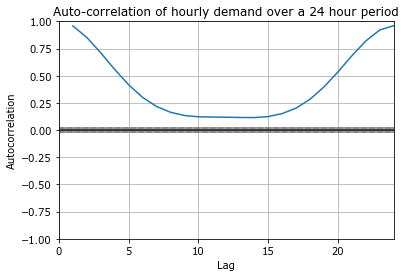

In [754]:
#The autocorrelation plot below shows the extent to which the demand variable correlates with itself at different intervals (lags). 
#This plot shows that demand is highly autocorrelated over the closest 6 hour period.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final2['LV'])
plt.xlim(0,24)
plt.title('Auto-correlation of hourly demand over a 24 hour period')
plt.show()

In [824]:
def generate_lagged_features(df, max_lag):
    for t in range(1, max_lag+1):
        df['LV_lag'+str(t)] = df['LV'].shift(t, freq='1H')

In [825]:
generate_lagged_features(final2, 6)

In [826]:
final2

,LV,Weekday,Holiday,LVForecastEstimation,%LVofTotal,ActualTotal,Deviation,ForecastTotalLoad,Timestamp,Day,Month,Year,Hour,LV_lag1,LV_lag2,LV_lag3,LV_lag4,LV_lag5,LV_lag6
Timestamp,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,3933.209685,1,1,3928.618104,0.739157,5321.211918,6.211918,5315.0,2018-01-01 00:00:00,1,1,2018,0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,3615.862294,1,1,3584.743969,0.722294,5006.082645,43.082645,4963.0,2018-01-01 01:00:00,1,1,2018,1,3933.209685,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,3531.408073,1,1,3481.997027,0.719718,4906.653316,68.653316,4838.0,2018-01-01 02:00:00,1,1,2018,2,3615.862294,3933.209685,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,3250.926682,1,1,3171.205588,0.702371,4628.502808,113.502808,4515.0,2018-01-01 03:00:00,1,1,2018,3,3531.408073,3615.862294,3933.209685,NaN,NaN,NaN
2018-01-01 04:00:00,3027.204711,1,1,2874.047836,0.671507,4508.079510,228.079510,4280.0,2018-01-01 04:00:00,1,1,2018,4,3250.926682,3531.408073,3615.862294,3933.209685,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 19:00:00,4050.675054,4,0,3961.302143,0.659009,6146.617165,135.617165,6011.0,2019-10-31 19:00:00,31,10,2019,19,4008.164369,3551.311406,3207.483538,3262.911283,3488.646619,3608.437275
2019-10-31 20:00:00,3998.556006,4,0,3901.933643,0.659891,6059.421771,146.421771,5913.0,2019-10-31 20:00:00,31,10,2019,20,4050.675054,4008.164369,3551.311406,3207.483538,3262.911283,3488.646619
2019-10-31 21:00:00,3681.134314,4,0,3598.459103,0.651541,5649.891865,126.891865,5523.0,2019-10-31 21:00:00,31,10,2019,21,3998.556006,4050.675054,4008.164369,3551.311406,3207.483538,3262.911283


In [827]:
final2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16056 entries, 2018-01-01 00:00:00 to 2019-10-31 23:00:00
Freq: H
Data columns (total 19 columns):
LV                      16056 non-null float64
Weekday                 16056 non-null int64
Holiday                 16056 non-null int64
LVForecastEstimation    16056 non-null float64
%LVofTotal              16056 non-null float64
ActualTotal             16056 non-null float64
Deviation               16056 non-null float64
ForecastTotalLoad       16056 non-null float64
Timestamp               16056 non-null datetime64[ns]
Day                     16056 non-null int64
Month                   16056 non-null int64
Year                    16056 non-null int64
Hour                    16056 non-null int64
LV_lag1                 16055 non-null float64
LV_lag2                 16054 non-null float64
LV_lag3                 16053 non-null float64
LV_lag4                 16052 non-null float64
LV_lag5                 16051 non-null float64
LV_lag6

In [828]:
final2.dropna(how='any', inplace=True)

In [829]:
final2=final2[['Weekday','Holiday','Year','Month','Hour','LV','LV_lag1','LV_lag2','LV_lag3','LV_lag4','LV_lag5','LV_lag6']]

In [830]:
X_train=final2.loc[:'2019-08-31'][['Year','Month','Hour','Weekday','Holiday','LV_lag1','LV_lag2','LV_lag3','LV_lag4','LV_lag5','LV_lag6']]
y_train=final2.loc[:'2019-08-31']['LV']

In [831]:
X_test=final2.loc['2019-09-15':'2019-09-15'][['Year','Month','Hour','Weekday','Holiday','LV_lag1','LV_lag2','LV_lag3','LV_lag4','LV_lag5','LV_lag6']]
y_test=final2.loc['2019-09-15':'2019-09-15']['LV'].to_frame()

In [833]:
y_their=final.loc['2019-09-15':'2019-09-15']['LVForecastEstimation']

# GridSearch RF

In [834]:
from sklearn.model_selection import GridSearchCV

In [835]:
rfc=RandomForestRegressor(random_state = 0,n_estimators=700,
                          min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=20)

param_grid = { 
    'n_estimators': [200, 300,400,500,600,700,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10, 15, 100],
    'max_depth' : [5,10,15,20,25,30],
    'min_samples_leaf' : [1, 2, 5, 10]
}


In [836]:
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
#CV_rfc.fit(X_train, y_train)
#print(CV_rfc.best_params_)
#{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}

Forecast the same day as the models before in order to be able to compare.

In [837]:
#fit the model
f=rfc.fit(X_train,y_train)

In [838]:
#make predictions
y_1= f.predict(X_test)

In [839]:
from statsmodels.tools.eval_measures import mse,rmse
#calculate rmse
OurError= rmse(y_1, y_test['LV'])

In [840]:
#Our Error for 24 hour predictions
OurError

65.1199786233645

In [841]:
#TheirError for 24 hour predictions
TheirError= rmse(y_their, y_test['LV'])

In [842]:
TheirError

123.23233504842186

In [843]:
#prediction data maniulation
t=pd.DataFrame(y_test.index)
t1=pd.DataFrame({'Pred':y_1})
result = pd.concat([t, t1], axis=1, sort=False)
result.set_index('Timestamp',inplace=True)
t2=pd.DataFrame(final.loc['2019-09-15':'2019-09-15']['LVForecastEstimation'])
result2=pd.concat([result,t2],axis=1,sort=False)
result3=pd.concat([result2,y_test],axis=1,sort=False)

In [844]:
result3.columns = ['Prediction', 'Pred(ADMHE)','Actual']

In [845]:
result3

,Prediction,Pred(ADMHE),Actual
Timestamp,,,
2019-09-15 00:00:00,2858.344187,2645.300607,2902.763294
2019-09-15 01:00:00,2594.609270,2513.984774,2655.955430
2019-09-15 02:00:00,2523.246418,2329.880614,2469.018933
2019-09-15 03:00:00,2360.118355,2240.425081,2365.265871
2019-09-15 04:00:00,2295.466957,2204.395112,2305.693300
2019-09-15 05:00:00,2311.975608,2201.969460,2299.071236
2019-09-15 06:00:00,2359.732903,2241.353874,2356.332090
2019-09-15 07:00:00,2546.876483,2276.785073,2361.557496
2019-09-15 08:00:00,2577.201846,2565.957350,2685.277618


TypeError: float() argument must be a string or a number, not 'Period'

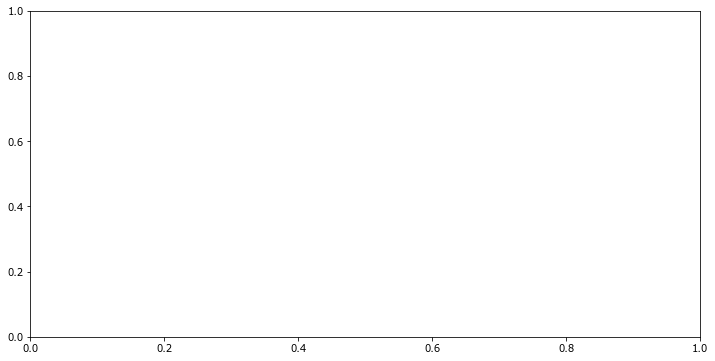

In [846]:
# Plot all of them in different weekly periods
ax = y_test['LV'].loc['2019-09-15':'2019-09-15'].plot(legend=True,figsize=(12,6))
result['Pred'].loc['2019-09-15':'2019-09-15'].plot(legend=True)
y_their.loc['2019-09-15':'2019-09-15'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

# Whole Month Forecast Experiment

In [847]:
X_train=final2.loc[:'2019-08-31'][['Year','Month','Hour','Weekday','Holiday','LV_lag1','LV_lag2','LV_lag3','LV_lag4','LV_lag5','LV_lag6']]
y_train=final2.loc[:'2019-08-31']['LV']

In [848]:
X_test=final2.loc['2019-09-01':'2019-09-30'][['Year','Month','Hour','Weekday','Holiday','LV_lag1','LV_lag2','LV_lag3','LV_lag4','LV_lag5','LV_lag6']]
y_test=final2.loc['2019-09-01':'2019-09-30']['LV'].to_frame()

In [849]:
y_their=final.loc['2019-09-01':'2019-09-30']['LVForecastEstimation']

In [850]:
rfc=RandomForestRegressor(random_state = 0,n_estimators=700,
                          min_samples_leaf=1,min_samples_split=2,max_features='auto',max_depth=20)

In [851]:
#fit the model
f=rfc.fit(X_train,y_train)

In [852]:
#make predictions
y_1= f.predict(X_test)

In [853]:
from statsmodels.tools.eval_measures import mse,rmse
#calculate rmse
OurError= rmse(y_1, y_test['LV'])

In [854]:
#Our Error for whole september
OurError

74.27597495145537

In [855]:
TheirError= rmse(y_their, y_test['LV'])

In [856]:
#Their Error for whole september
TheirError

88.1461224329604

In [857]:
#prediction data maniulation
t=pd.DataFrame(y_test.index)
t1=pd.DataFrame({'Pred':y_1})
result = pd.concat([t, t1], axis=1, sort=False)
result.set_index('Timestamp',inplace=True)
t2=pd.DataFrame(final.loc['2019-09-01':'2019-09-30']['LVForecastEstimation'])
result2=pd.concat([result,t2],axis=1,sort=False)
result3=pd.concat([result2,y_test],axis=1,sort=False)


In [858]:
result3.columns = ['Prediction', 'Pred(ADMHE)','Actual']

In [859]:
result3

,Prediction,Pred(ADMHE),Actual
Timestamp,,,
2019-09-01 00:00:00,3515.700451,3499.514338,3549.123970
2019-09-01 01:00:00,3227.319647,3235.462588,3283.696417
2019-09-01 02:00:00,3082.756459,3033.586654,3073.410633
2019-09-01 03:00:00,2946.067803,2900.084989,2928.807426
2019-09-01 04:00:00,2833.724689,2804.914082,2834.027904
...,...,...,...
2019-09-30 19:00:00,3667.310119,3858.535581,3826.308438
2019-09-30 20:00:00,4235.171489,4122.569953,4075.101694
2019-09-30 21:00:00,3855.378752,3813.867927,3763.093504


TypeError: float() argument must be a string or a number, not 'Period'

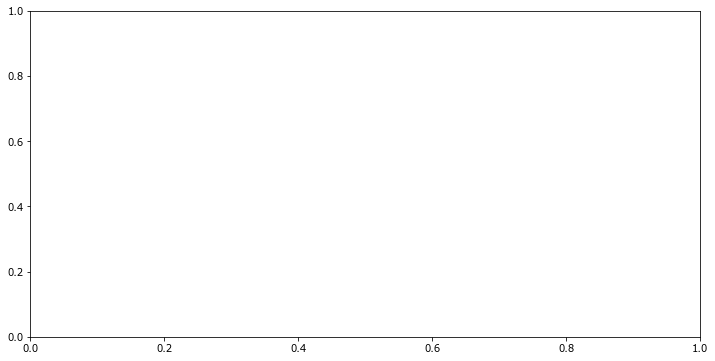

In [860]:
# Plot ADMHE predictions vs actuals
ax = y_test['LV'].plot(legend=True,figsize=(12,6))
y_their.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
# Plot predictions vs actuals
ax = y_test['LV'].plot(legend=True,figsize=(12,6))
result['Pred'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
# Plot all of them in different daily periods10
ax = y_test['LV'].loc['2019-09-05':'2019-09-06'].plot(legend=True,figsize=(12,6))
result['Pred'].loc['2019-09-05':'2019-09-06'].plot(legend=True)
y_their.loc['2019-09-05':'2019-09-06'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
# Plot all of them in different daily periods
ax = y_test['LV'].loc['2019-09-20':'2019-09-20'].plot(legend=True,figsize=(12,6))
result['Pred'].loc['2019-09-20':'2019-09-20'].plot(legend=True)
y_their.loc['2019-09-20':'2019-09-20'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
# Plot all of them in different daily periods
ax = y_test['LV'].loc['2019-09-26':'2019-09-26'].plot(legend=True,figsize=(12,6))
result['Pred'].loc['2019-09-26':'2019-09-26'].plot(legend=True)
y_their.loc['2019-09-26':'2019-09-26'].plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
# Plot all of them in different daily periods
ax = y_test['LV'].loc['2019-09-11':'2019-09-11'].plot(legend=True,figsize=(12,6))
result['Pred'].loc['2019-09-11':'2019-09-11'].plot(legend=True)
y_their.loc['2019-09-11':'2019-09-11'].plot(legend=True)
ax.autoscale(axis='x',tight=True)